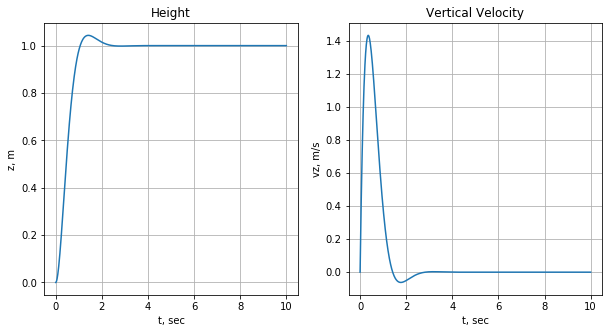

In [11]:
%matplotlib inline
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

m = 1
g = 9.8

def control(t, x, xd):
    zeta = 0.707
    wn = 1*np.pi
    u = m*g + 2*zeta*wn*(xd[1] - x[1]) + wn**2*(xd[0] - x[0])
    return u

def ode(t, x):
    xd = [1, 0]
    u = control(t, x, xd)
    return [x[1], -m*g + u]

t = np.linspace(0, 10, 1000)
res = scipy.integrate.solve_ivp(ode, t_eval=t, t_span=[t[0], t[-1]], y0=[0, 0])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(res['t'], res['y'][0, :], label='z')
plt.title('Height')
plt.xlabel('t, sec')
plt.ylabel('z, m')
plt.grid()

plt.subplot(122)
plt.plot(res['t'], res['y'][1, :], label='vz')
plt.title('Vertical Velocity')
plt.xlabel('t, sec')
plt.ylabel('vz, m/s')
plt.grid()